# Similar Product Recommendations
> A tutorial on building a recommender system that will find similar looking products

- toc: true
- badges: true
- comments: true
- categories: [similarity vision]
- image:

In [10]:
!jupyter nbconvert --ClearMetadataPreprocessor.enabled=True --to notebook --inplace seu_notebook.ipynb


[NbConvertApp] WARNING | pattern 'seu_notebook.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
  

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.SE6Y6K_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.
✅ 6 imagens salvas na pasta 'imagens/'
📷 6 imagens encontradas.


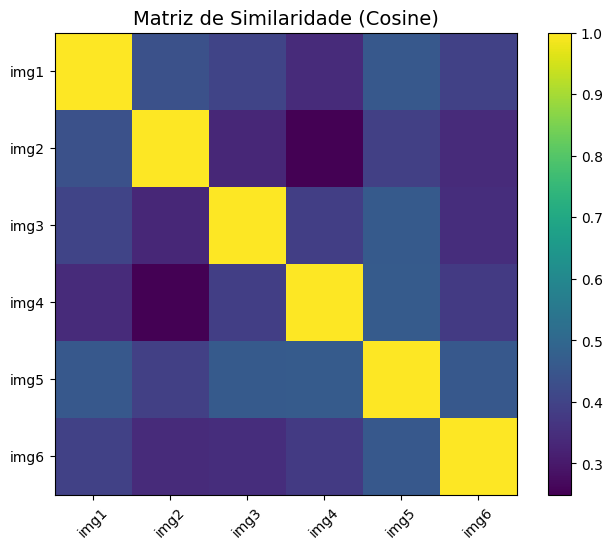

In [9]:
import os
import numpy as np
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

# -------------------------------
# 1. Baixar dataset do TensorFlow
# -------------------------------
pasta_imagens = "imagens"
os.makedirs(pasta_imagens, exist_ok=True)

if len(os.listdir(pasta_imagens)) == 0:
    dataset, info = tfds.load("cats_vs_dogs", split="train[:6]", with_info=True, as_supervised=True)
    for i, (img, label) in enumerate(tfds.as_numpy(dataset)):
        caminho = os.path.join(pasta_imagens, f"img{i+1}.jpg")
        plt.imsave(caminho, img.astype("uint8"))
    print("✅ 6 imagens salvas na pasta 'imagens/'")
else:
    print("📂 Imagens já existem na pasta.")

# -------------------------------
# 2. Carregar modelo pré-treinado
# -------------------------------
base_model = ResNet50(weights="imagenet", include_top=False, pooling="avg")
model = Model(inputs=base_model.input, outputs=base_model.output)

# -------------------------------
# 3. Função para extrair embeddings
# -------------------------------
def extrair_embedding(caminho_img):
    img = image.load_img(caminho_img, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = model.predict(x, verbose=0)
    return features.flatten()

# -------------------------------
# 4. Processar todas as imagens
# -------------------------------
arquivos = [os.path.join(pasta_imagens, f) for f in os.listdir(pasta_imagens) if f.endswith((".jpg", ".png", ".jpeg"))]

if len(arquivos) == 0:
    raise Exception("❌ Nenhuma imagem encontrada na pasta 'imagens/'.")

print(f"📷 {len(arquivos)} imagens encontradas.")

embeddings = [extrair_embedding(img) for img in arquivos]

# -------------------------------
# 5. Calcular similaridade
# -------------------------------
similaridades = cosine_similarity(embeddings)

# -------------------------------
# 6. Mostrar matriz de similaridade
# -------------------------------
plt.figure(figsize=(8,6))
plt.imshow(similaridades, cmap="viridis")
plt.colorbar()
plt.title("Matriz de Similaridade (Cosine)", fontsize=14)
plt.xticks(range(len(arquivos)), [f"img{i+1}" for i in range(len(arquivos))], rotation=45)
plt.yticks(range(len(arquivos)), [f"img{i+1}" for i in range(len(arquivos))])
plt.show()
